In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LeakyReLU
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print ("Eğitim veri sayımız:",x_train.shape[0])
print ("Test veri sayımız:",x_test.shape[0])

Eğitim veri sayımız: 60000
Test veri sayımız: 10000


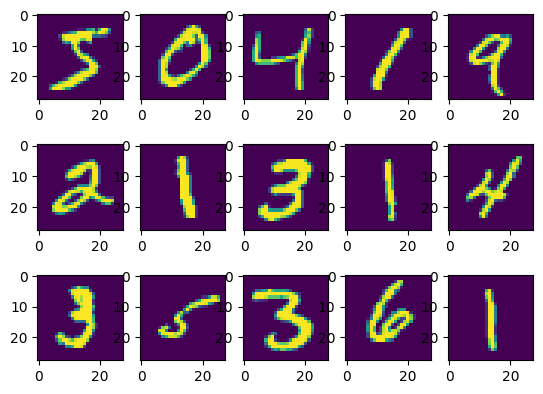

In [ ]:
x, y = 3, 5

for i in range(15):
    plt.subplot(x, y, i+1)
    plt.imshow(x_train[i])

plt.show()

In [ ]:
print (y_train[:15])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# normalizasyon
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:


x_train = x_train.reshape (-1,28,28,1)
x_test = x_test.reshape (-1,28,28,1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
print (x_train.shape)
print (y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [ ]:
 x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=30)

In [ ]:
print ("Eğitim veri sayımız:",x_train.shape[0])
print ("Val veri sayımız:",x_val.shape[0])
print ("Test veri sayımız:",x_test.shape[0])

Eğitim veri sayımız: 54000
Val veri sayımız: 6000
Test veri sayımız: 10000


In [ ]:
print (x_train.shape)
print (x_val.shape)
print (x_test.shape)
print ( y_train.shape)
print (y_val.shape)

(54000, 28, 28, 1)
(6000, 28, 28, 1)
(10000, 28, 28, 1)
(54000, 10)
(6000, 10)


In [ ]:
batch_size =32
epochs=30
input_shape= (28,28,1)

In [ ]:
model_1 = Sequential()

In [ ]:
model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_1.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                   

In [ ]:
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    #loss='mean_squared_error',
    metrics=['accuracy']
)

In [ ]:
model_1.optimizer.lr=0.001

In [ ]:
callback= EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True, verbose=1, mode='min')

In [ ]:
history_1= model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          verbose=1,
          callbacks= callback,
          validation_data=(x_val, y_val)
                      )

Epoch 1/30
1688/1688 [==============================] - 23s 9ms/step - loss: 0.3696 - accuracy: 0.8862 - val_loss: 0.0684 - val_accuracy: 0.9810
Epoch 2/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1331 - accuracy: 0.9645 - val_loss: 0.0542 - val_accuracy: 0.9850
Epoch 3/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1057 - accuracy: 0.9711 - val_loss: 0.0468 - val_accuracy: 0.9870
Epoch 4/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0889 - accuracy: 0.9764 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 5/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0788 - accuracy: 0.9795 - val_loss: 0.0466 - val_accuracy: 0.9895
Epoch 6/30
1688/1688 [==============================] - 23s 13ms/step - loss: 0.0726 - accuracy: 0.9806 - val_loss: 0.0401 - val_accuracy: 0.9915
Epoch 7/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0675 - accuracy: 0.9822 - val_loss: 0.0430 - val_

In [ ]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.024370402097702026
Test Accuracy: 0.9923999905586243


In [ ]:
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


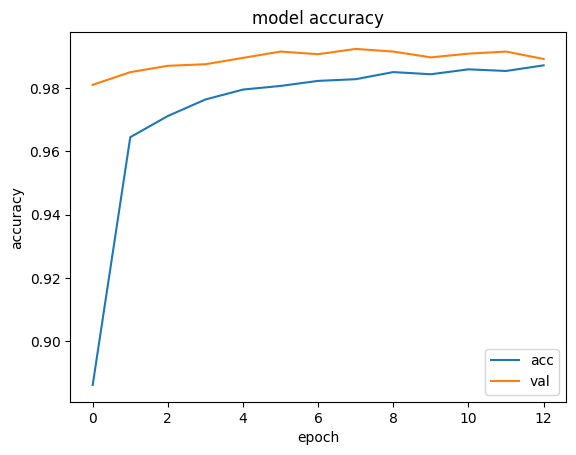

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val',], loc='lower right')
plt.show()

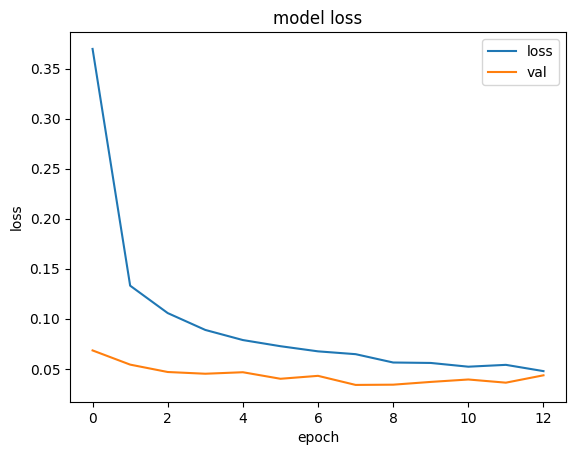

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val'], loc='upper right')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


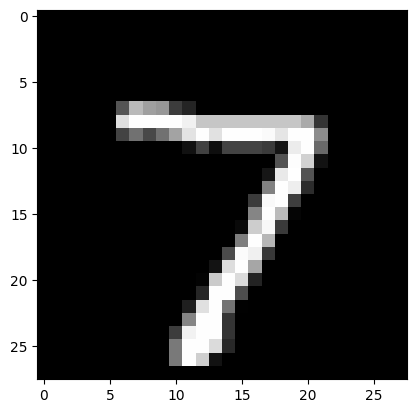

In [ ]:
test_image= x_test[0]
print (y_test[0])

plt.imshow(x_test[0],cmap='gray')
plt.show()

In [ ]:
"""test_data=x_test[0].reshape(-1,28,28,1)
predictions = model_1.predict(test_data)
predicted_class = np.argmax(predictions, axis=1)
print(predicted_class)"""

test_data=x_test[0].reshape(-1,28,28,1)
pre = model_1.predict(test_data)


1/1 [==============================] - 0s 93ms/step


In [ ]:
test_data_10=x_test[:10].reshape(-1,28,28,1)
pre_10 = model_1.predict(test_data_10, batch_size=1)

10/10 [==============================] - 0s 3ms/step


In [ ]:
prop_10= model_1.predict(test_data_10)

1/1 [==============================] - 0s 232ms/step


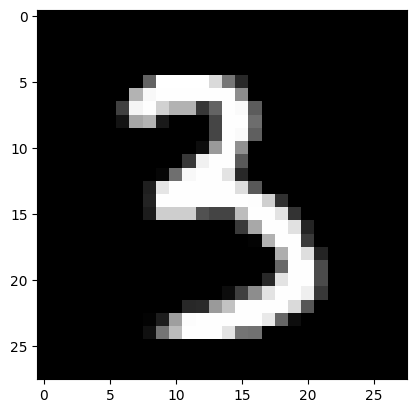

In [ ]:
plt.imshow(x_test[32],cmap='gray')
plt.show()

In [ ]:
test_image= x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
predictions = model_1.predict(x_test[:15])

1/1 [==============================] - 0s 193ms/step


In [ ]:
print(np.argmax(predictions, axis=1))

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


In [ ]:
print(y_test[:15])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


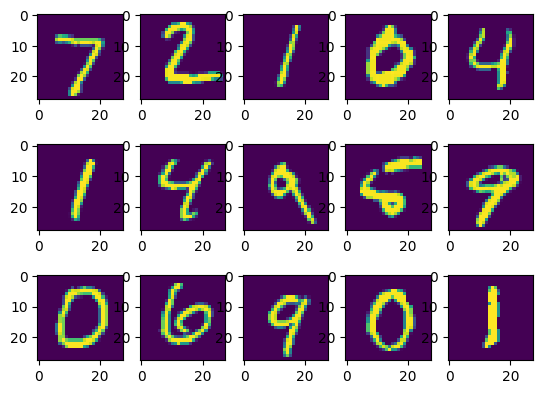

In [ ]:
for i in range(15):
    plt.subplot(x, y, i+1)
    plt.imshow(x_test[i])

plt.show()

In [ ]:
# Modelin tahminlerini al
predictions = model_1.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#confusion_matrix fonksiyonunu kullanarak karmaşıklık matrisini hesapla
cm = confusion_matrix(true_classes, predicted_classes)

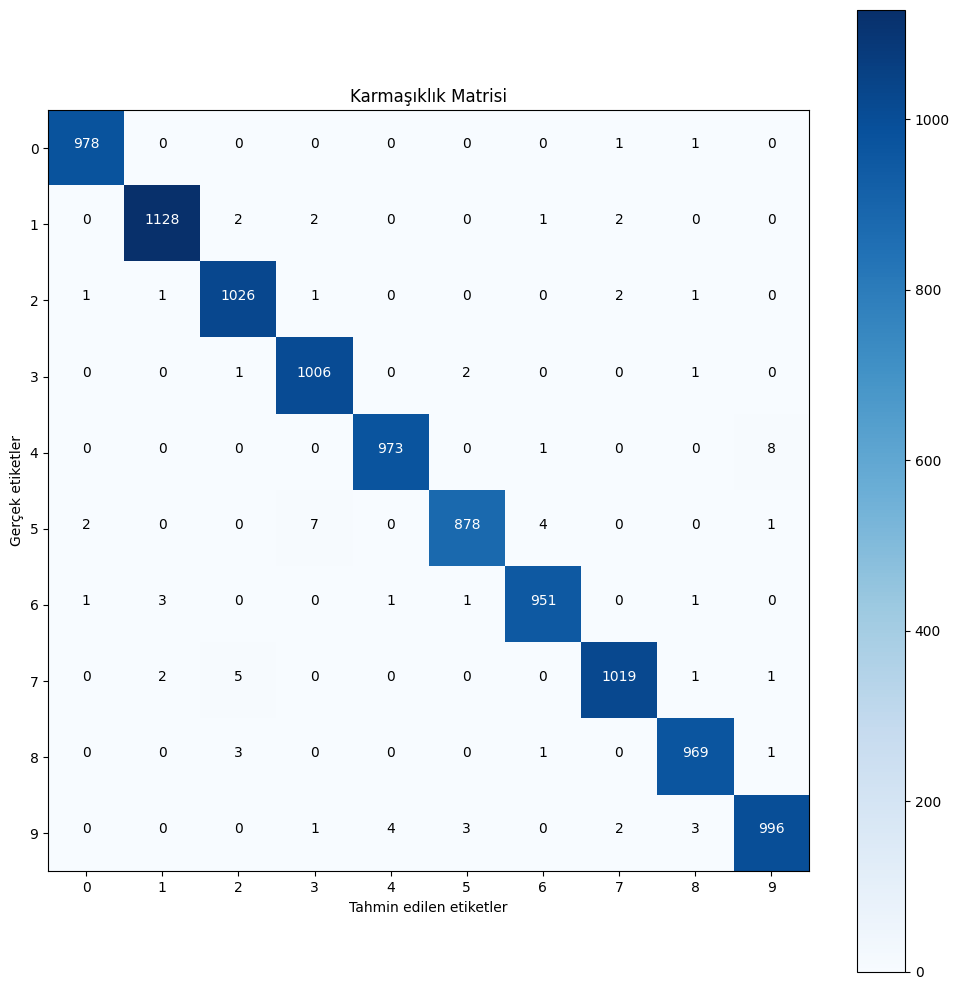

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Karmaşıklık Matrisi")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Gerçek etiketler')
plt.xlabel('Tahmin edilen etiketler')
plt.show()

In [ ]:
"""

Yüklediğiniz karmaşıklık matrisine göre, 0. sınıf (0 rakamı) için doğru ve yanlış tahminler şunlardır:

Doğru Tahminler (True Positives, TP): 0. sınıf, yani rakam '0' için doğru tahmin edilenlerin sayısı, matrisin sol üst köşesinde yer alan sayıdır. Bu durumda 978 doğru tahmin edilmiş.
Yanlış Negatifler (False Negatives, FN): 0. sınıf için yanlış negatif, modelin 0 olmasına rağmen başka bir rakam tahmin ettiği durumlardır.
Bu matriste 0. sınıf için yanlış negatif sayısı, 0. satırdaki 0 olmayan diğer sayıların toplamıdır. Burada 0 olarak tahmin edilmeyip başka sınıflara atanmış hiçbir yanlış negatif yoktur.
Yanlış Pozitifler (False Positives, FP): 0. sınıf için yanlış pozitif, modelin 0 olmayan bir rakamı 0 olarak tahmin ettiği durumlardır.
Bu matriste 0. sınıf için yanlış pozitif sayısı, 0. sütundaki 0 olmayan diğer sayıların toplamıdır. Bu durumda 0. sütunda 0 dışındaki sayılar (2, 1, 0, 0, 2, 1, 0, 0, 0) vardır ve toplamda 6 yanlış pozitif tahmin vardır.
Bu sonuçlara dayanarak, modelin 0. sınıf için çok yüksek bir doğruluk oranı ile doğru tahminler yaptığını, çok az yanlış pozitif tahmin olduğunu söyleyebiliriz.
 Yani, 0 rakamını genellikle doğru bir şekilde tanıyıp, çok az sayıda diğer rakamları yanlışlıkla 0 olarak sınıflandırmış.

